In [1]:
# 輸入資料
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from numpy import random
from sklearn.metrics import accuracy_score
from numpy import *
from numpy.random import seed


df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label']
display(df.head())

X = df[['Petal length', 'Petal width']].values
y = pd.factorize(df['Class label'])[0]

# discard exmaples in the first class
X = X[50:150]
y = np.where(y[50:150] == 2, -1, y[50:150])

,Sepal length,Sepal width,Petal length,Petal width,Class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# 切 train,test 比例 0.8,0.2 ，並標準化
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [3]:
class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=50, shuffle=True,batch_size=1, random_state=123):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.batch_size = batch_size
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            random_idxs = random.choice(len(y), len(y), replace=False)
            # X,y做切分
            X_shuffled = X[random_idxs,:]
            y_shuffled = y[random_idxs]
            new_X = [(X_shuffled[i:i+self.batch_size,:]) for i in range(0, len(y), self.batch_size)]
            new_y = [(y_shuffled[i:i+self.batch_size]) for i in range(0, len(y), self.batch_size)]
            cost = []
            for xi, target in zip(new_X, new_y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / (len(y)/self.batch_size)
            self.cost_.append(avg_cost)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Randomly initialize weights"""
        self.w_ = np.random.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(xi)
        error = (target - output)
        self.w_[1:] += self.eta * error.dot(xi)
        self.w_[0] += self.eta * error.sum()
        cost = 0.5 * (error**2).sum()
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

FileNotFoundError: [Errno 2] No such file or directory: './output/Lab04-1_106024518.png'

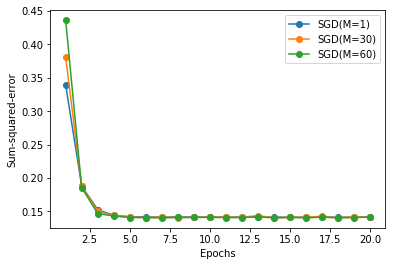

In [5]:
# M取[1,30,65]
a=1
b=30
c=60

adas1 = AdalineSGD(n_iter=20, eta=0.005, random_state=123,batch_size=a)
adas1.fit(X_train_std, y_train)
adas2 = AdalineSGD(n_iter=20, eta=0.005, random_state=123,batch_size=b)
adas2.fit(X_train_std, y_train)
adas3 = AdalineSGD(n_iter=20, eta=0.005, random_state=123,batch_size=c)
adas3.fit(X_train_std, y_train)

y_pred1 = adas1.predict(X_test_std)
y_pred2 = adas2.predict(X_test_std)
y_pred3 = adas3.predict(X_test_std)


plt.plot(range(1, len(adas1.cost_) + 1), np.array(adas1.cost_)/a,  marker='o', label='SGD(M=1)')
plt.plot(range(1, len(adas2.cost_) + 1), np.array(adas2.cost_)/b,  marker='o', label='SGD(M=30)')
plt.plot(range(1, len(adas3.cost_) + 1), np.array(adas3.cost_)/c,  marker='o', label='SGD(M=60)')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.legend(loc='upper right')
plt.savefig('./output/Lab04-1_106024518.png', dpi=300)
plt.tight_layout()
plt.show()


print('M : ',a,',Misclassified samples : %d' % (y_test != y_pred1).sum(),',Accuracy : %.2f' % accuracy_score(y_test, y_pred1))
print('M : ',b,',Misclassified samples : %d' % (y_test != y_pred2).sum(),',Accuracy : %.2f' % accuracy_score(y_test, y_pred2))
print('M : ',c,',Misclassified samples : %d' % (y_test != y_pred3).sum(),',Accuracy : %.2f' % accuracy_score(y_test, y_pred3))